Inatll the required packages

In [1]:
pip install psycopg2

  Using cached psycopg2-2.9.9-cp312-cp312-win_amd64.whl.metadata (4.5 kB)
Using cached psycopg2-2.9.9-cp312-cp312-win_amd64.whl (1.2 MB)
Note: you may need to restart the kernel to use updated packages.


Connecting to Local Postgres and intitating a cursor

In [63]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


conn = psycopg2.connect(
    database="postgres",
    user="postgres",
    password="happy",
    host="localhost",
    port="5432"
)
cur= conn.cursor()

Storing the Queried data from Poostgres to their respective Dataframes

In [108]:
df_pandas_query1 = pd.read_sql_query("""select CustomerID,sum(UnitPrice*Quantity) TotalAmount from OnlineRetail 
where CustomerID is not null and Quantity > 0 
group by CustomerID 
order by TotalAmount desc limit 10""",conn)

C:\Users\Server_dpk\AppData\Local\Temp\ipykernel_11660\3647915699.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_pandas_query1 = pd.read_sql_query("""select CustomerID,sum(UnitPrice*Quantity) TotalAmount from OnlineRetail


In [98]:
df_pandas_query2 = pd.read_sql_query("""select stockcode,Description,sum(quantity) as TotalQuantity from OnlineRetail
where quantity>0
group by stockcode,Description
order by TotalQuantity desc limit 10""",conn)

C:\Users\Server_dpk\AppData\Local\Temp\ipykernel_11660\77308880.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_pandas_query2 = pd.read_sql_query("""select stockcode,Description,sum(quantity) as TotalQuantity from OnlineRetail


In [112]:
df_pandas_query3 = pd.read_sql_query("""select  to_char(invoicedate,'YYYY-MM') as YearMonth,to_char(invoicedate,'Month') as Month,
round(sum(UnitPrice*Quantity),2) as TotalRevenue  from OnlineRetail 
where quantity>0
group by to_char(invoicedate,'YYYY-MM'),to_char(invoicedate,'Month')
order by TotalRevenue desc limit 10""",conn)

C:\Users\Server_dpk\AppData\Local\Temp\ipykernel_11660\4214866450.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_pandas_query3 = pd.read_sql_query("""select  to_char(invoicedate,'YYYY-MM') as YearMonth,to_char(invoicedate,'Month') as Month,


In [117]:
df_pandas_query1_sorted = df_pandas_query1.sort_values(by='totalamount',ascending=False)
df_pandas_query1_sorted.head()

,customerid,totalamount
0,14646,280206.02
1,18102,259657.30
2,17450,194550.79
3,16446,168472.50
4,14911,143825.06


In [114]:
df_pandas_query3_sorted = df_pandas_query3.sort_values(by='yearmonth',ascending=False)
df_pandas_query3_sorted.head()

,yearmonth,month,totalrevenue
0,2011-11,November,1509496.33
1,2011-10,October,1154979.30
2,2011-09,September,1058590.17
6,2011-08,August,737014.26
7,2011-07,July,719221.19


Close the Connection to Postgres

In [23]:
cur.close()
conn.close()

Visualizations for the Dataframes we have defined previously

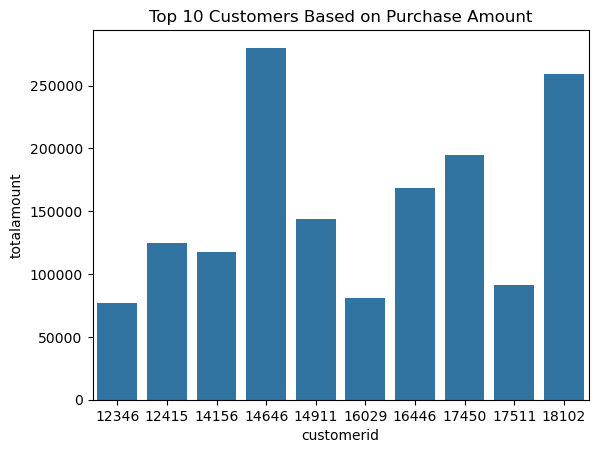

In [127]:
sns.barplot(x='customerid',y='totalamount',data=df_pandas_query1_sorted)
plt.title('Top 10 Customers Based on Purchase Amount')
plt.savefig('TopCustomers.png')

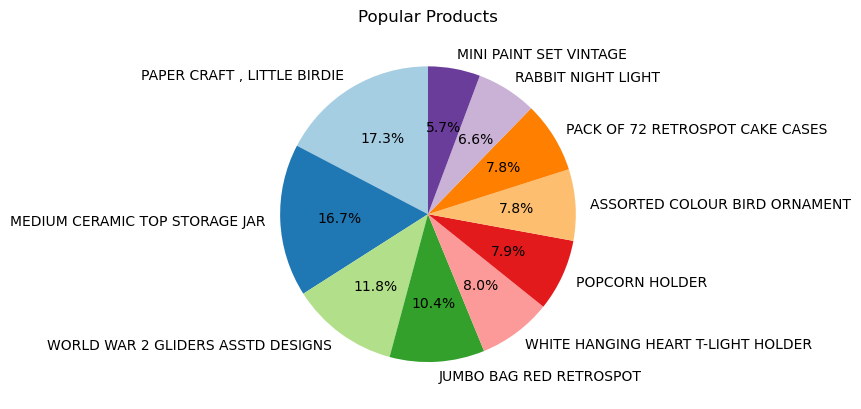

In [126]:
df_pandas_query2.head()

plt.pie(df_pandas_query2['totalquantity'],labels=df_pandas_query2['description'],
        autopct='%1.1f%%',startangle=90,colors=plt.cm.Paired.colors
       )
plt.title('Popular Products')
plt.savefig('Popular_Products.png')

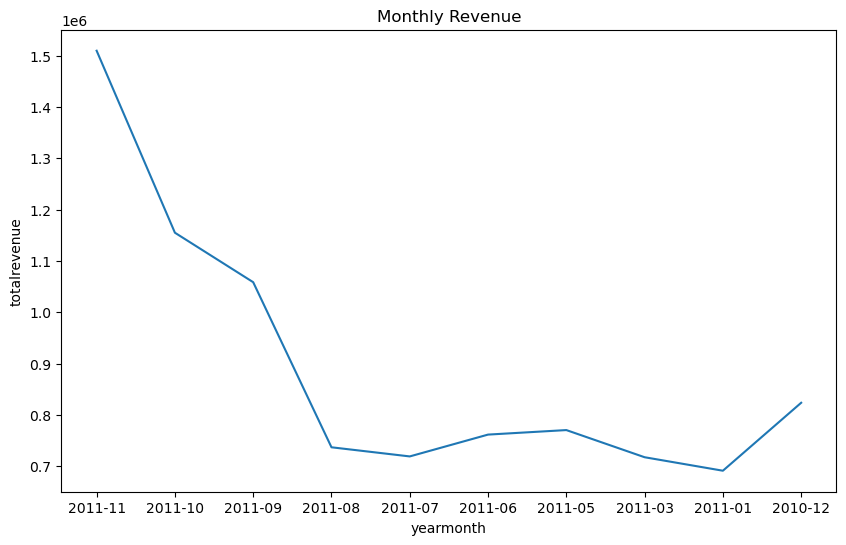

In [125]:
plt.figure(figsize=(10,6))
sns.lineplot(x='yearmonth',y='totalrevenue',data=df_pandas_query3_sorted)
plt.title('Monthly Revenue')
plt.savefig('Monthly_Revenue.jpg')